This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Zbior diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Wczytanie pakietów

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from mlxtend import plotting
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

pd.set_option("display.max_columns", 101)
plt.rcParams["figure.figsize"] = (20,6) 
%matplotlib inline


### Eksploracja

#### Wczytanie zbioru danych

<li>Pregnancies - num of times Pregnant</li>
<li>Glucose - plasma glucose concentration</li>
<li>BloodPressure - diastolic blood pressure (mm Hg)</li>
<li>SkinThickness - triceps skin fold thickness (mm)</li>
<li>Insulin - 2-hour serum insulin (mu U/ml)</li>
<li>BMI - Body Mass Index</li>
<li>DiabetesPedigreeFunction - diabetes pedigree function (a function which scores likelihood of diabetes based on family history).</li>
<li>Age - age in years</li>
<li>Outcome - whether the lady is diabetic or not, 0 - is not diabetic, 1 is diabetic.</li>

In [2]:
df = pd.read_csv('diabetes.csv')

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
n = len(df)
print("Wszystkich przypadków: ", n)

Wszystkich przypadków:  768


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b>Wniosek: </b>Ciekawe, bo minimalne wartość w Glucose, BloodPressure, SkinThicknes, Insulin i BMI wynoszą 0!

In [8]:
ile_0_glucose = np.count_nonzero(df["Glucose"]==0)
proc_glucose = round(100*(ile_0_glucose/n),2)
print("Przypdaków z zerową glukozą: {0}, co daje {1}% wszystkich przypadków.".format(ile_0_glucose, proc_glucose))

Przypdaków z zerową glukozą: 5, co daje 0.65% wszystkich przypadków.


In [9]:
ile_0_pressure = np.count_nonzero(df["BloodPressure"]==0)
proc_press = round(100*(ile_0_pressure/n),2)
print("Przypdaków z zerowym ciśnieniem: {0}, co daje {1}% wszystkich przypadków.".format(ile_0_pressure, proc_press))

Przypdaków z zerowym ciśnieniem: 35, co daje 4.56% wszystkich przypadków.


In [10]:
ile_0_skin = np.count_nonzero(df["SkinThickness"]==0)
proc_skin = round(100*(ile_0_skin/n),2)
print("Przypdaków z zerową grubością skóry: {0}, co daje {1}% wszystkich przypadków.".format(ile_0_skin, proc_skin))

Przypdaków z zerową grubością skóry: 227, co daje 29.56% wszystkich przypadków.


In [11]:
ile_0_BMI = np.count_nonzero(df["BMI"]==0)
proc_BMI = round(100*(ile_0_BMI/n),2)
print("Przypdaków z zerowym BMI: {0}, co daje {1}% wszystkich przypadków.".format(ile_0_BMI, proc_BMI))

Przypdaków z zerowym BMI: 11, co daje 1.43% wszystkich przypadków.


In [12]:
ile_0_insulin = np.count_nonzero(df["Insulin"]==0)
proc_insulin = round(100*(ile_0_insulin/n),2)
print("Przypdaków z zerową insuliną: {0}, co daje {1}% wszystkich przypadków.".format(ile_0_insulin, proc_insulin))

Przypdaków z zerową insuliną: 374, co daje 48.7% wszystkich przypadków.


<b>Wniosek </b>Insuline trzeba wyrzucić bo prawie 50% braków. Resztę na razie zastąpie medianami.


In [13]:
df.drop(columns=["Insulin"], inplace=True)

In [14]:
col = ['Glucose', 'BloodPressure', 'SkinThickness',  'BMI'] 
df[col] = df[col].replace(0, df[col].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


#### Sprawdzenie udziału poszczególnych kategorii


### Wykresy
1. Pudełko
2. Histogram

In [15]:
columns = list(df.columns)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

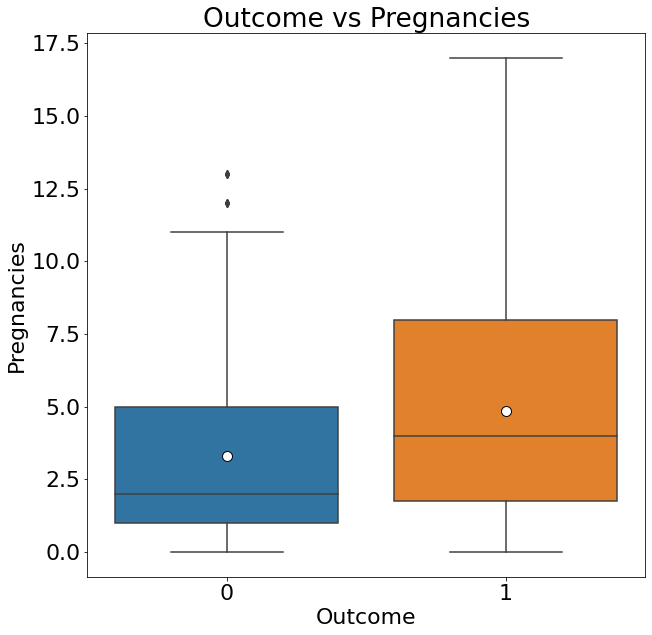

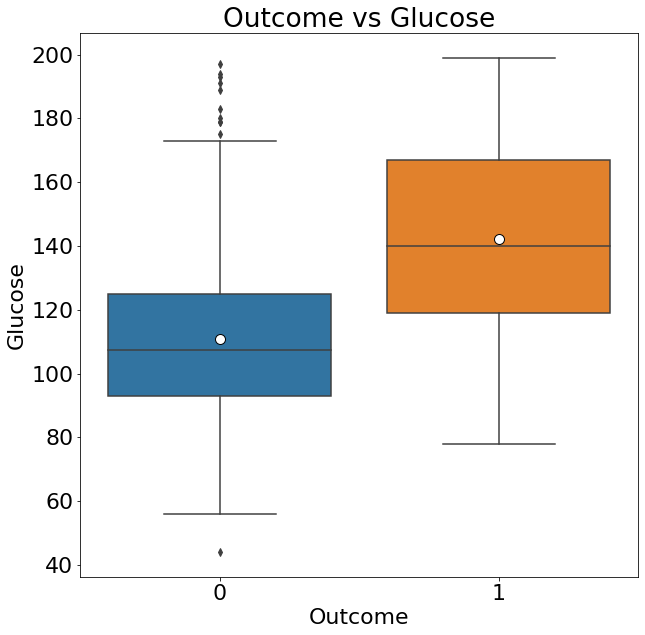

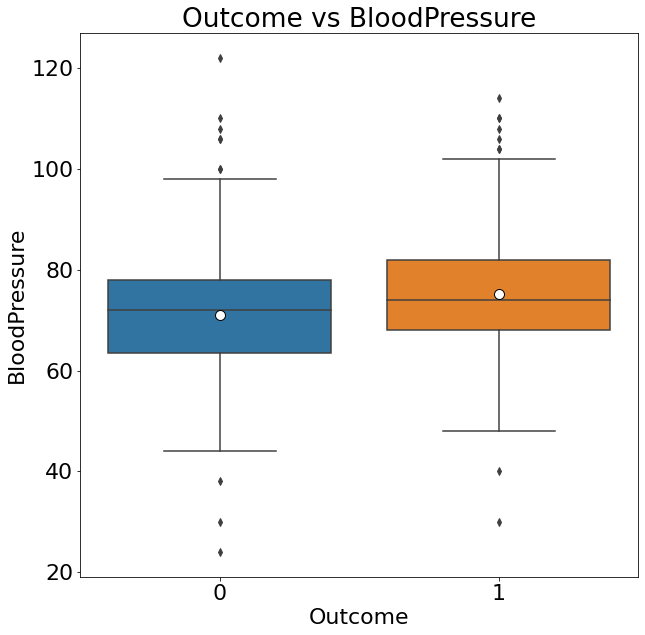

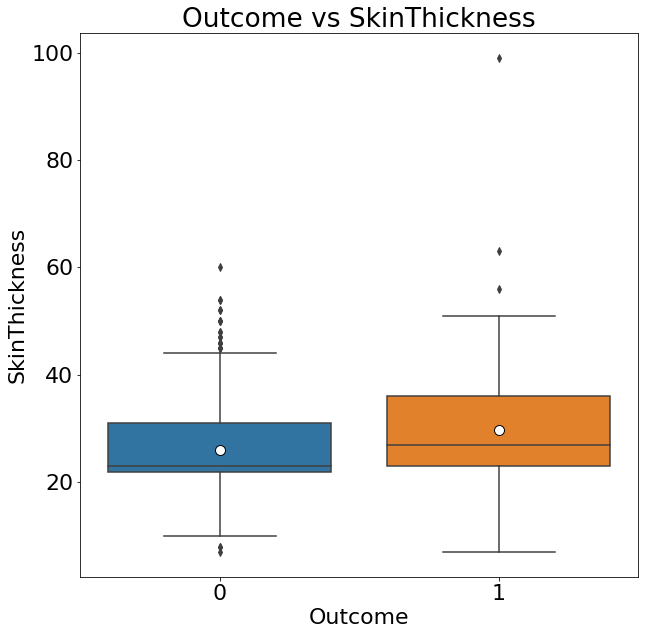

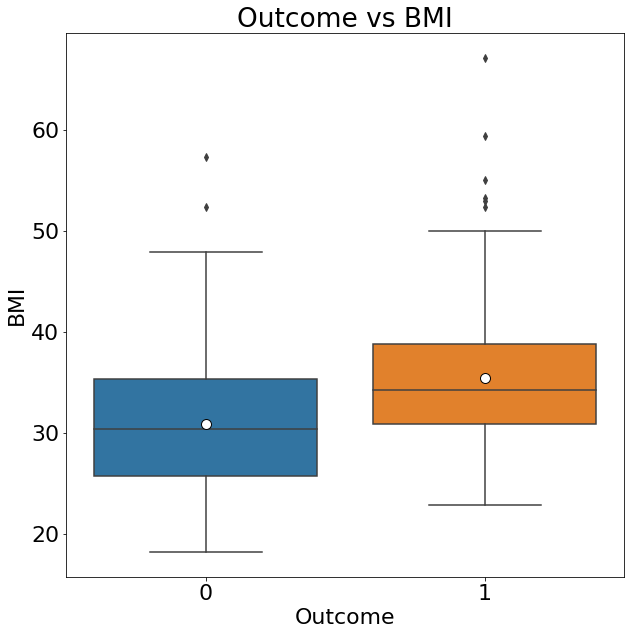

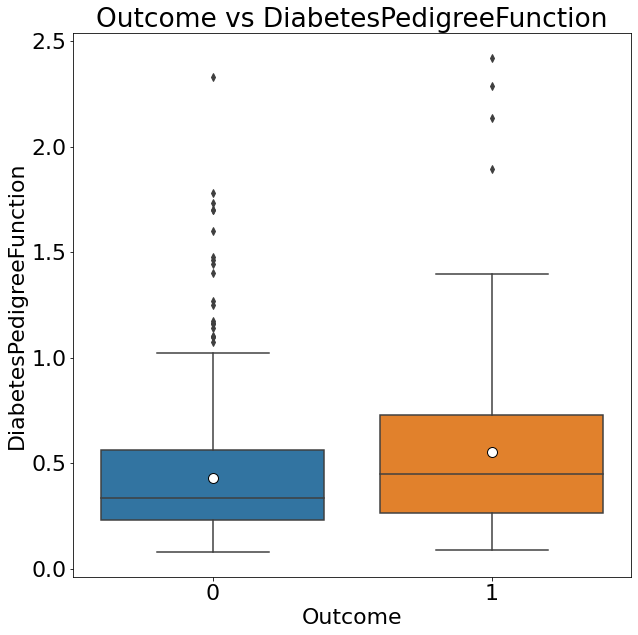

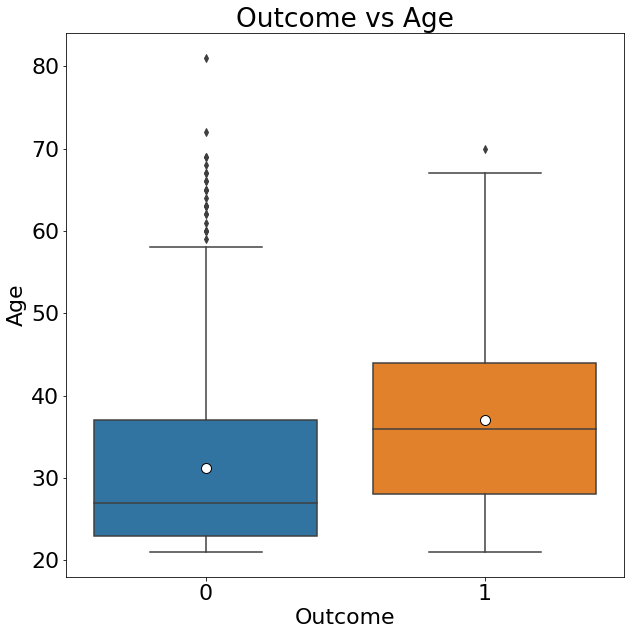

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({"font.size": 22})
for c in columns:
    if c!='Outcome':
        ax = sns.boxplot(x="Outcome", y=df[c], 
                 data=df, 
                 showmeans=True, 
                 meanprops={"marker":"o",
                     "markerfacecolor":"white", 
                     "markeredgecolor":"black",
                     "markersize":"10"} )
        plt.title("Outcome vs {}".format(c))

        plt.show()

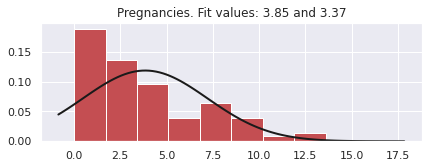

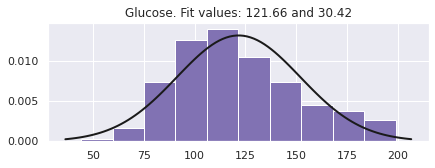

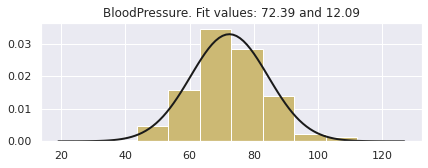

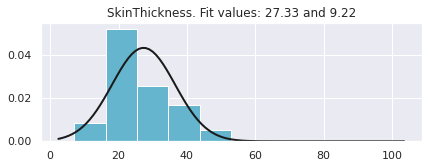

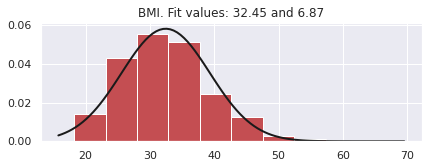

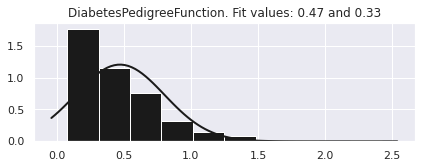

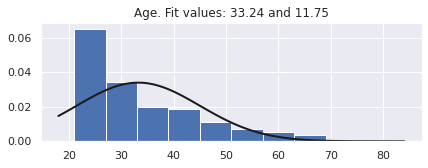

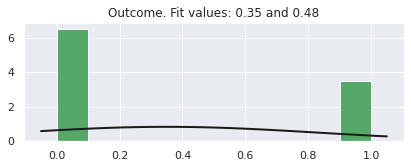

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
colours=['r','m','y','c','r','k','b','g']
i=0
for c in columns:
    plt.subplot(4,2,i+1)
    plt.hist(df[c], density=True, color=colours[i])
    i += 1
    mu, std = st.norm.fit(df[c]) 
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = st.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "{}. Fit values: {:.2f} and {:.2f}".format(c, mu, std)
    plt.title(title)
    plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>]],
      dtype=object)

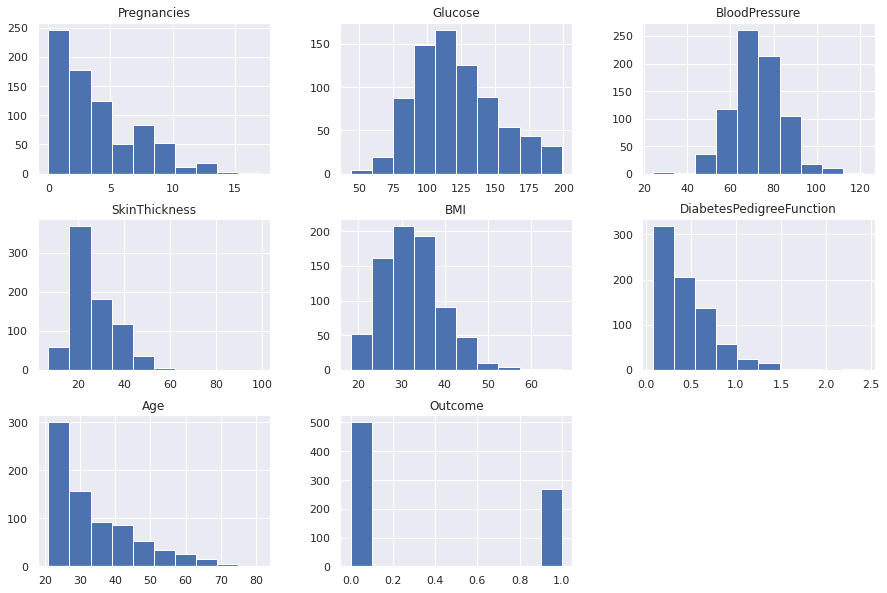

In [18]:
df.hist()

<b>Wnioski: </b>
    <li>Wysoka glukoza zwiększa ryzyko cukrzycy.</li>
    <li>Wysokie ciśnienie zwiększa ryzyko cukrzycy.</li>
    <li>Wyoska insulina zwiększa ryzyko cukrzycy.</li>
    <li>Wysokie BMI zwiększa ryzyko cukrzycy.</li>
    <li>Ryzyko cukrzycy rośnie z wiekiem.</li>
    
    

#### Sprawdzenie braków danych

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Korelacja

In [20]:
corr = df.corr()

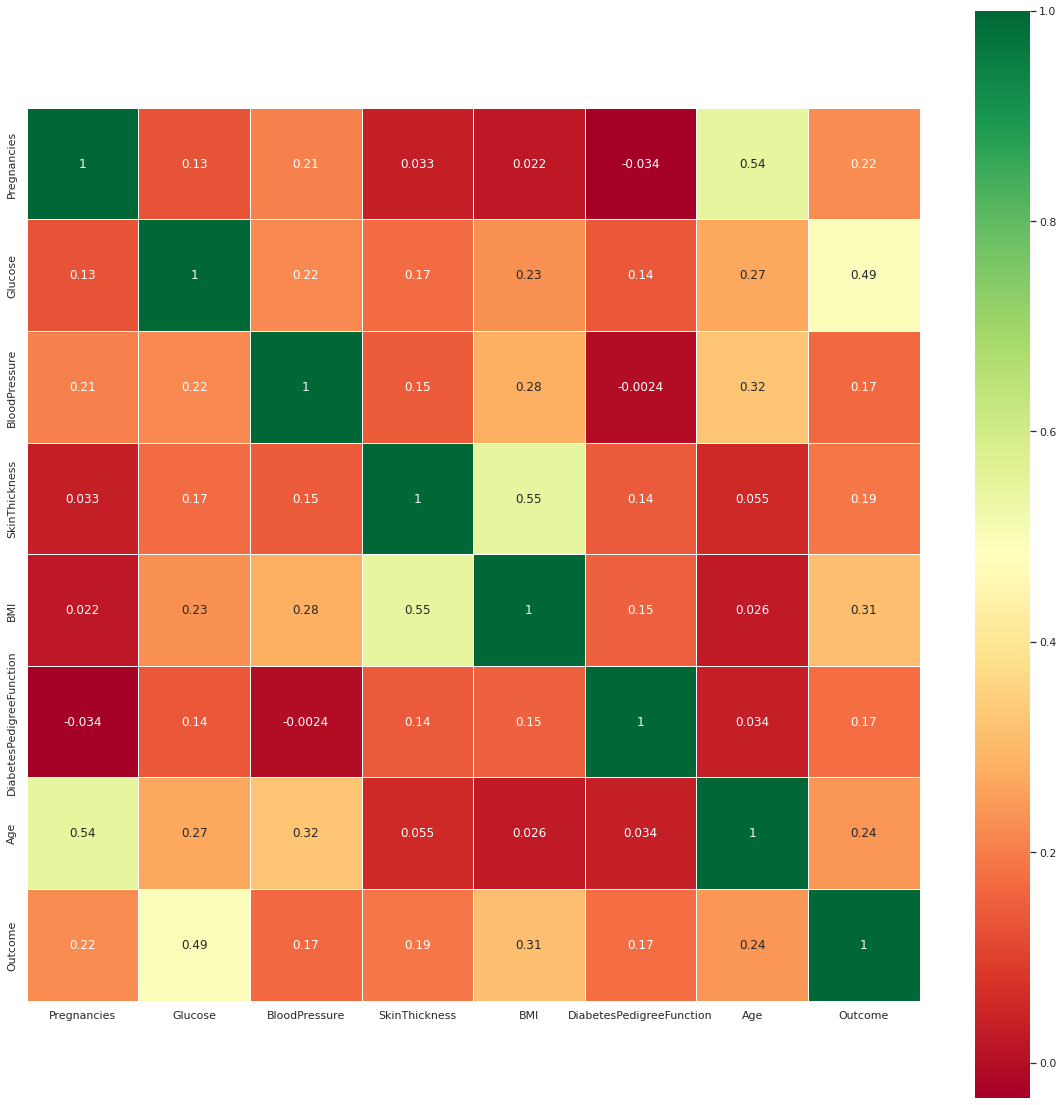

In [21]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, square=True, linewidths=1, annot = True, cmap="RdYlGn")
pass

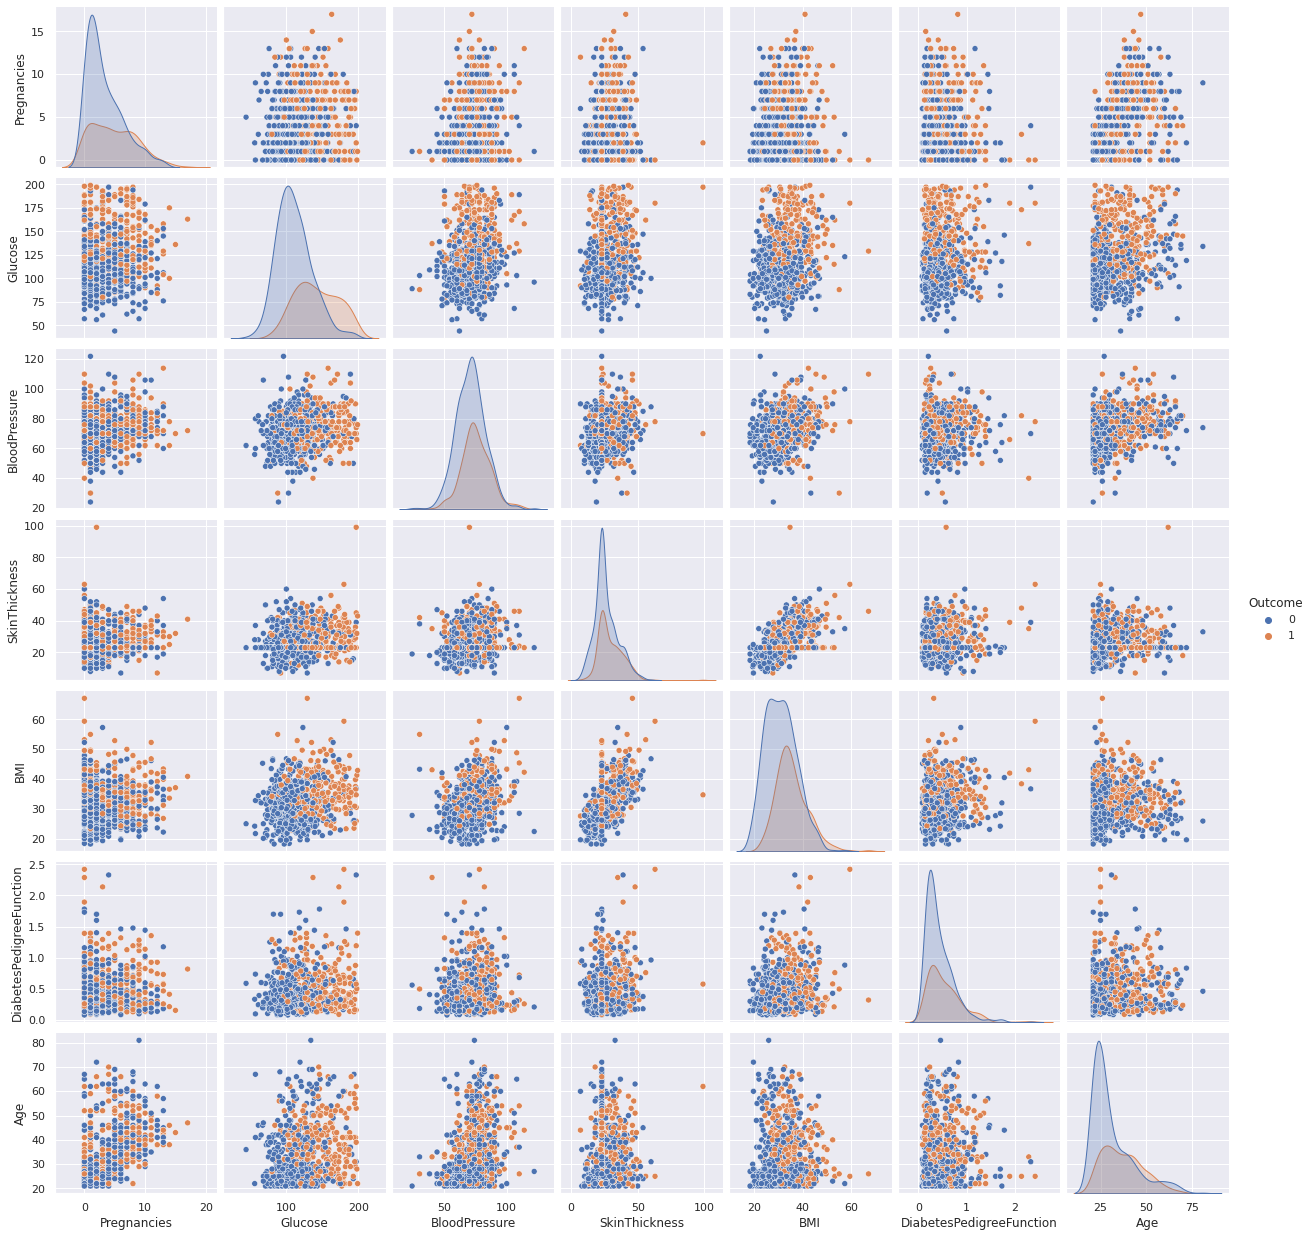

In [22]:
sns.pairplot(df, hue="Outcome")
pass

<b>Wniosek: </b>Z wykresów widzimy, że istnieją małe korelacje. Największa zależność między Outcome a Glucose (0,49), BMI (0,31) i Age (0,24).

### Feature Engineering

#### Stworzenie zmiennych 0-1 dla kategorii


In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,23,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,23,30.1,0.349,47,1


### Przygotowanie zbioru
#### Podział zbioru na treningowy i testowy

In [25]:
trainingSet, testSet = train_test_split(df, test_size=0.2)
trainingSet.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
X_train = trainingSet[df.columns[:-1]]
y_train = trainingSet["Outcome"]
X_test = testSet[df.columns[:-1]]
y_test = testSet["Outcome"]
print(y_test.head())
print(y_train.value_counts())

573    0
218    1
518    0
34     0
20     0
Name: Outcome, dtype: int64
0    391
1    223
Name: Outcome, dtype: int64


In [27]:
print("Rozmiary podziału ",[[X_train.size, y_train.size],[X_test.size, y_test.size]])

Rozmiary podziału  [[4298, 614], [1078, 154]]


#### Standaryzacja

In [28]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Analiza głównych składowych

In [29]:
pca_results = PCA(n_components=3)
pca_results.fit(X_train_scaled)

PCA(n_components=3)

In [30]:
X_train_pca = pca_results.transform(X_train_scaled)
X_train_pca

array([[-0.97754073, -1.5135604 , -1.0718708 ],
       [-0.10619021, -0.58338802,  0.29178942],
       [ 1.59098481,  2.79652411,  0.21758939],
       ...,
       [ 0.05619534, -2.68730768, -0.46227168],
       [ 0.17618547, -0.95977848, -1.15642658],
       [-1.52648373, -0.82988121,  1.7037803 ]])

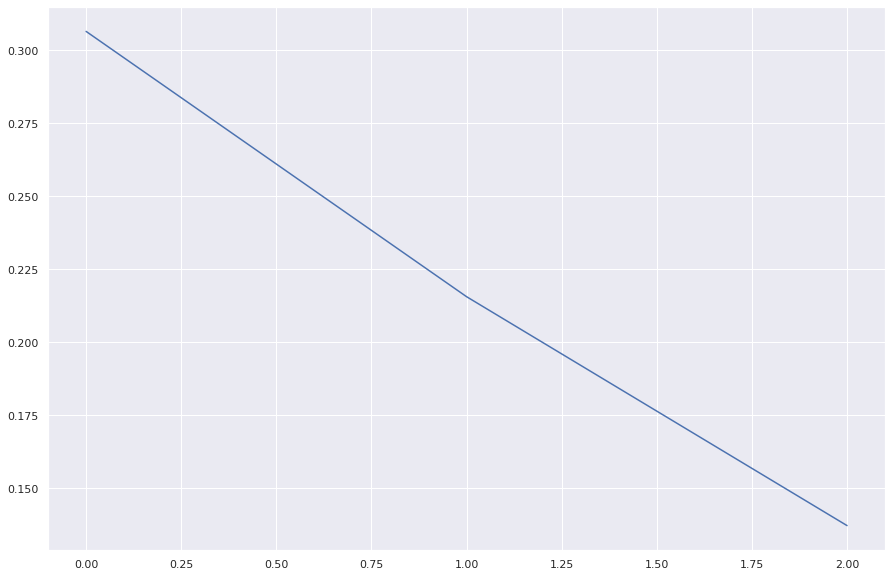

In [31]:
plt.plot(pca_results.explained_variance_ratio_)

In [32]:
PCA_result = PCA(n_components = 3)
PCA_result.fit(X_test_scaled)
X_test_PCA = PCA_result.transform(X_test_scaled)

In [33]:
PCA_result.fit(X_train)
X_train_PCA2 = PCA_result.transform(X_train)
PCA_result.fit(X_test)
X_test_PCA2 = PCA_result.transform(X_test)

### Estymacja modelu klasyfikacyjnego

Użyj wybranego modelu klasyfikacyjnego znanego Ci z zajęć. Wyestymuj dwa modele - jeden na wystandaryzowanych danych, a drugi na PCA.  

Feature: 0, Score: 0.11290
Feature: 1, Score: 0.03006
Feature: 2, Score: -0.02225
Feature: 3, Score: -0.00561
Feature: 4, Score: 0.06219
Feature: 5, Score: 0.42222
Feature: 6, Score: 0.00609


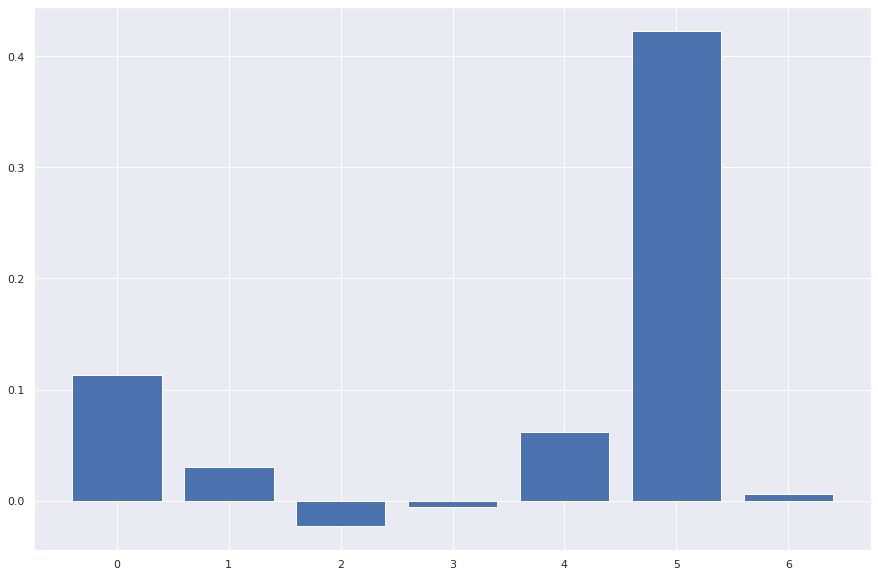

In [34]:
# 1. Reg. log.

logmodel = LogisticRegression(random_state=1337, solver='liblinear')
logmodel.fit(X_train, y_train);
importance = logmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.08555
Feature: 1, Score: 0.35494
Feature: 2, Score: 0.05186
Feature: 3, Score: 0.03581
Feature: 4, Score: 0.17232
Feature: 5, Score: 0.09821
Feature: 6, Score: 0.20131


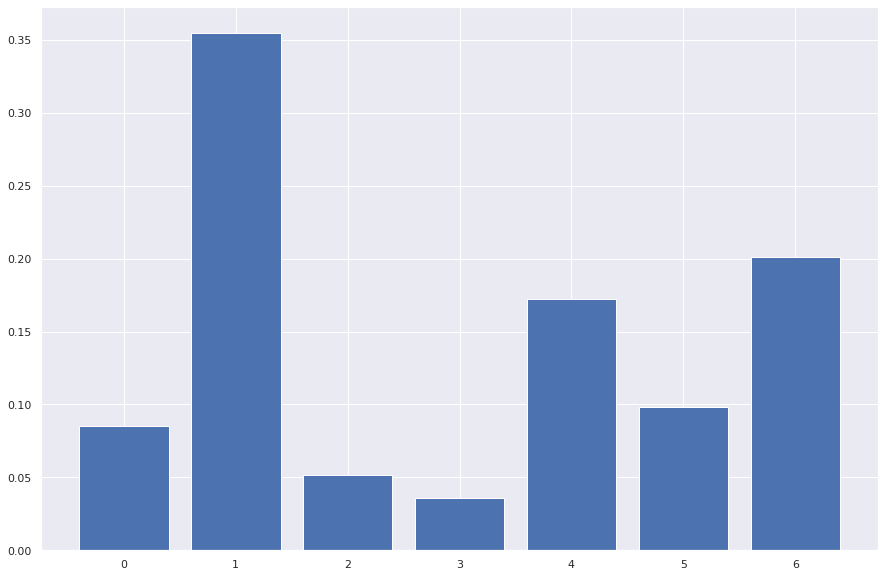

In [35]:
# 2. DT

model_tree= DecisionTreeClassifier().fit(X_train,y_train)

importance = model_tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.08652
Feature: 1, Score: 0.28461
Feature: 2, Score: 0.09682
Feature: 3, Score: 0.08279
Feature: 4, Score: 0.17817
Feature: 5, Score: 0.13079
Feature: 6, Score: 0.14030


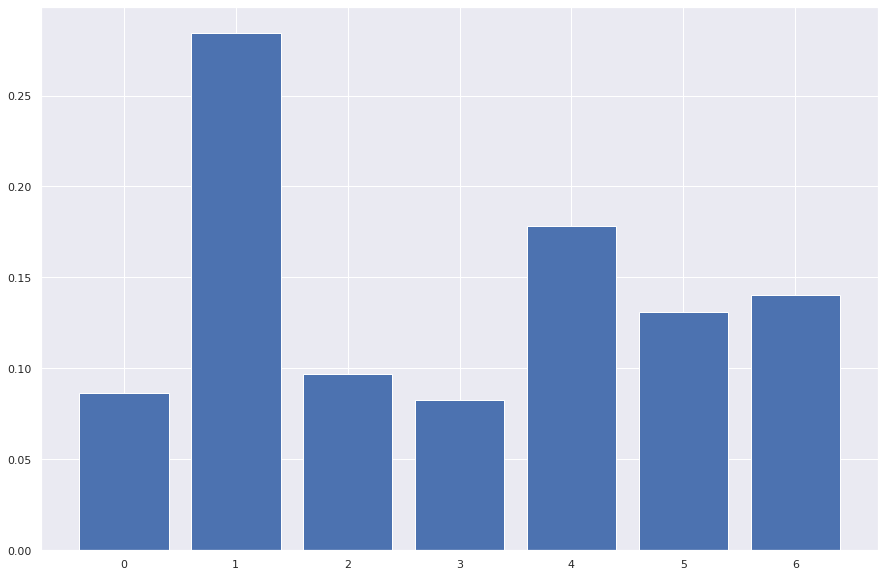

In [36]:
# 3. RF

forest = ensemble.RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

importance = forest.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Ocena jakości modelu klasyfikacyjnego

Wyznacz accuracy, precision, lub inne miary znane Ci z zajęć, które uznasz za stosowne. Porównaj wyniki dla obydwu modeli na odpowiednich zbiorach (Dane wystandaryzowane, dane PCA)


In [37]:
# 1. Reg. log.
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       109
           1       0.79      0.60      0.68        45

    accuracy                           0.84       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.83      0.84      0.83       154



In [38]:
# 2. DT
pred_tree_train =  model_tree.predict(X_train)
pred_tree_test =  model_tree.predict(X_test)
print(classification_report(y_test, pred_tree_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       109
           1       0.50      0.51      0.51        45

    accuracy                           0.71       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.71      0.71      0.71       154



In [39]:
# 3. RF
predictions_forest = forest.predict(X_test)
print(classification_report(y_test, predictions_forest))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.64      0.60      0.62        45

    accuracy                           0.79       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

